In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import glob
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
mpl.rcParams['savefig.dpi'] = 128
mpl.rcParams['figure.dpi'] = 128
# Plot size to 14" x 7"
mpl.rc('figure', figsize = (14, 7))
# Font size to 14
mpl.rc('font', size = 14)
# Do not display top and right frame lines
mpl.rc('axes.spines', top = False, right = False)
# Remove grid lines
mpl.rc('axes', grid = False)
# Set backgound color to white
mpl.rc('axes', facecolor = 'white')

In [2]:
# read whole year data
allFiles = glob.glob("data/*/*.csv")
df = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,encoding="utf-8")
    list_.append(df)
df = pd.concat(list_)

df.shape

(387804, 49)

In [3]:
df.drop_duplicates(inplace=True)
df.shape

(349403, 49)

In [4]:
def transform_cols(df):
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace('_', ' ')
    return df

In [5]:
df = transform_cols(df)

In [6]:
selected_features = ['classification','enquired',
                     'loan amount','loan reason','property use']
# selected_features = ['marketing code','enquired',
#                      'loan amount','loan reason','property use']
# selected_features = ['classification','enquired']
# selected_features = ['marketing code','classification','enquired',
#                      'loan amount','loan reason','property use']

target = 'enquiry status';
whole_set = selected_features + [target]

df = df[whole_set]

In [7]:
df = df[~df[target].isin(['In Progress','Just Received','On Hold'])]
df.shape

(344804, 6)

In [8]:
def clearnLoanAmount(df): 
    invalid_columns= ['500001-$1000000',
                  '300001-$500000',
                  '0-$300000',
                  '250000 - 300000',
                  '250000-350000',
                  '2600 monthly',
                  'not_sure',
                  '1000,001+',
                 '9999-',
                  'I50000',
                  '1.5 M',
                  '1000001+',
                  '9999-',
                  '80-90k']
    if 'loan amount' in df.columns: 
        df['loan amount'].fillna(0,inplace=True)
        # convert to string to do replacement
        df['loan amount'] = df['loan amount'].astype("str")
        df['loan amount'] = df['loan amount'].str.replace(",","")
        df = df[~df['loan amount'].isin(invalid_columns)]
    return df

In [9]:
df = clearnLoanAmount(df)

In [10]:
df.shape

(344042, 6)

In [11]:
df['loan reason'].fillna('Other Loan Reason',inplace=True)

In [12]:
df['loan reason'].value_counts()

First HomeBuyer                                           155485
Buying Again                                              102536
Refinance                                                  38610
Other Loan Reason                                          23646
Buying Again,Refinance                                     12986
Refinance With Cash Out                                     7487
Buying Again,Refinance With Cash Out                         779
Refinance,Refinance With Cash Out                            741
First HomeBuyer,Buying Again                                 570
First HomeBuyer,Refinance                                    565
Loan Topup                                                   320
Buying Again,Refinance,Refinance With Cash Out                64
Refinance,Loan Topup                                          60
Buying Again,Other Loan Reason                                40
First HomeBuyer,Refinance With Cash Out                       35
Refinance,Other Loan Reas

In [13]:
# df.loc[df['loan reason'].str.contains('First HomeBuyer'),'loan reason'] = 'First HomeBuyer'
# df.loc[df['loan reason'].str.contains('Buying Again'),'loan reason'] = 'Buying Again'
# df.loc[df['loan reason'].str.contains('Refinance'),'loan reason'] = 'Refinance'

df['loan reason'] = df['loan reason'].apply(lambda x: 'First HomeBuyer' if 'First HomeBuyer' in x else x)
df['loan reason'] = df['loan reason'].apply(lambda x: 'Buying Again' if 'Buying Again' in x else x)
df['loan reason'] = df['loan reason'].apply(lambda x: 'Refinance' if 'Refinance' in x else x)

In [14]:
df['loan reason'].value_counts()

First HomeBuyer      156702
Buying Again         116434
Refinance             46940
Other Loan Reason     23646
Loan Topup              320
Name: loan reason, dtype: int64

In [15]:
df['property use'].fillna('Other',inplace=True)

In [16]:
df['property use'].value_counts()

Residence                     240102
Other                          59056
Investment                     31916
Residence,Investment           12581
Residence,Other                  282
Investment,Other                  65
Residence,Investment,Other        40
Name: property use, dtype: int64

In [17]:
df['property use'] = df['property use'].apply(lambda x: 'Residence' if 'Residence' in x else x)
df['property use'] = df['property use'].apply(lambda x: 'Investment' if 'Investment' in x else x)

In [18]:
df['property use'].value_counts()

Residence     253005
Other          59056
Investment     31981
Name: property use, dtype: int64

In [19]:
df['classification'].fillna('None',inplace=True)

In [20]:
df['classification'].value_counts()

None                           63710
Domain                         47801
Direct                         40712
Google AdWords                 26868
REA                            24888
Coregistration                 21864
Alternative Media              19131
Affiliate                      17365
Omnilead                       12845
Phone                           9146
Home Sales                      8089
All Homes                       7678
Partners                        6380
First Home Buyers               5516
Domain Campaigns                5171
Email eChoice Database          4357
Finder                          3971
Domain Internal CBA Program     3620
Domain Campaigns CPA            1975
Domain Competitions             1791
External Email                  1275
Folio                           1173
Dynamic Home Loans              1093
Retention                       1078
Refinancing AdWords              893
Portals                          787
Portal Campaigns                 735
M

In [21]:
for _ in df.columns:
    print("The number of null values in: {} == {}".format(_, df[_].isnull().sum()))

The number of null values in: classification == 0
The number of null values in: enquired == 0
The number of null values in: loan amount == 0
The number of null values in: loan reason == 0
The number of null values in: property use == 0
The number of null values in: enquiry status == 0


In [22]:
df.dropna(axis=0, how='any', inplace=True)
df.shape

(344042, 6)

In [23]:
df.describe()

,classification,enquired,loan amount,loan reason,property use,enquiry status
count,344042,344042,344042,344042,344042,344042
unique,47,298778,14774,5,3,3
top,None,25-Feb-2016 00:35:26,0.0,First HomeBuyer,Residence,Rejected
freq,63710,9,43068,156702,253005,257604


In [24]:
for _ in df.columns:
    print("The number of null values in:{} == {}".format(_, df[_].isnull().sum()))

The number of null values in:classification == 0
The number of null values in:enquired == 0
The number of null values in:loan amount == 0
The number of null values in:loan reason == 0
The number of null values in:property use == 0
The number of null values in:enquiry status == 0


In [25]:
drop_values = ['QLD','victoria',"270-1176","VIC","2575b","6110r","2150s"]
if 'post code' in df.columns: 
    df = df[~df['post code'].isin(drop_values)]

In [26]:
df.to_csv("2007-2017_origin.csv",index=False)

In [27]:
def transform(df): 
    if 'loan amount' in df.columns: 
        df['loan amount'] = df['loan amount'].astype('float')
        
    if 'enquired' in df.columns: 
        df['enquired'] = pd.DatetimeIndex(df['enquired'])
        df['year'] = df['enquired'].dt.year
        df['month'] = df['enquired'].dt.month
        df['day'] = df['enquired'].dt.day
        df['hour'] = df['enquired'].dt.hour
        df['weekday'] = df['enquired'].dt.dayofweek
    
    if 'post code' in df.columns: 
        df['post code'] = df['post code'].astype('int')
    
    if 'enquired'in df.columns:
        df.drop(['enquired'], axis = 1, inplace = True)
        
    
    df.apply(lambda x: x.astype(str).str.lower())

In [28]:
transform(df)

In [43]:
if 'year' in df.columns:
    df = df[~(df['year'] < 2007)]
    display(df[(df['year'] < 2007)])

,classification,loan amount,loan reason,property use,enquiry status,year,month,day,hour,weekday


In [30]:
df.reset_index(drop=True,inplace=True)

In [31]:
test = df[df['enquiry status'] == 'Rejected']
test.shape

(257021, 10)

In [32]:
test = df[df['enquiry status'] == 'Accepted']
test.shape

(84136, 10)

In [33]:
test['year'].value_counts()

2008    13222
2007    13118
2009     7927
2015     7610
2010     7001
2014     6841
2016     6374
2013     6358
2011     6039
2012     5194
2017     4452
Name: year, dtype: int64

In [34]:
df.dtypes

classification     object
loan amount       float64
loan reason        object
property use       object
enquiry status     object
year                int64
month               int64
day                 int64
hour                int64
weekday             int64
dtype: object

In [35]:
df['classification'].value_counts()

None                           61849
Domain                         47801
Direct                         40045
Google AdWords                 26868
REA                            24721
Coregistration                 21864
Alternative Media              19131
Affiliate                      17365
Omnilead                       12845
Phone                           8975
Home Sales                      8089
All Homes                       7678
Partners                        6380
First Home Buyers               5516
Domain Campaigns                5171
Email eChoice Database          4357
Finder                          3971
Domain Internal CBA Program     3620
Domain Campaigns CPA            1975
Domain Competitions             1791
External Email                  1275
Folio                           1173
Dynamic Home Loans              1093
Retention                       1078
Refinancing AdWords              893
Portals                          787
Portal Campaigns                 735
M

In [36]:
# df = df[~df['marketing code'].isin(rows_to_drop)]
# df.shape
# df.drop_duplicates()
# duplicates = df[df.duplicated()]
# duplicates[duplicates['enquiry status'] == 'Accepted']

In [37]:
hist = test.groupby(['year']).size().reset_index(name="counts")

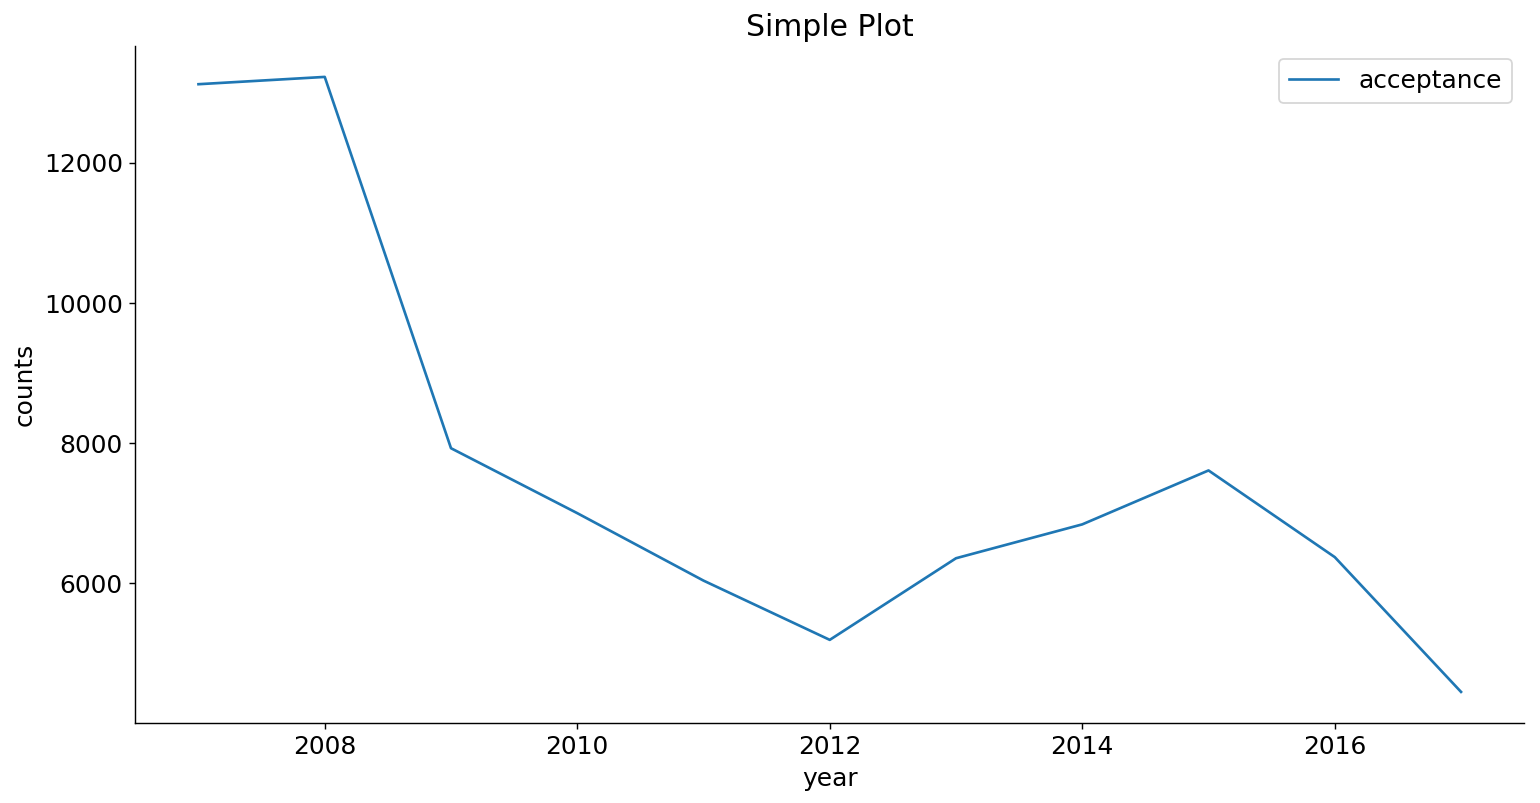

In [38]:
fig = plt.figure()
plt.plot(hist["year"], hist["counts"], label='acceptance')
plt.xlabel('year')
plt.ylabel('counts')
plt.title("Simple Plot")
plt.legend()
plt.show()

In [39]:
df.shape

(341170, 10)

In [40]:
data_frame = df.drop('year', axis = 1) 
data_frame['loan amount'] = data_frame['loan amount'].astype(int)

In [41]:
# df.to_csv("2014-2017.csv",index=False)

In [42]:
data_frame.to_csv("2007-2017.csv",index=False)

In [45]:
df[df.duplicated]

,classification,loan amount,loan reason,property use,enquiry status,year,month,day,hour,weekday
200,Affiliate,0.0,First HomeBuyer,Other,Rejected,2013,3,18,13,0
203,Affiliate,0.0,First HomeBuyer,Other,Rejected,2013,3,18,15,0
205,Affiliate,0.0,Refinance,Residence,Rejected,2013,3,18,15,0
243,Affiliate,0.0,First HomeBuyer,Other,Rejected,2013,3,25,14,0
244,Affiliate,0.0,First HomeBuyer,Other,Rejected,2013,3,25,14,0
247,Affiliate,0.0,First HomeBuyer,Other,Rejected,2013,3,25,14,0
248,Affiliate,0.0,First HomeBuyer,Other,Rejected,2013,3,25,14,0
250,Affiliate,0.0,First HomeBuyer,Other,Rejected,2013,3,25,14,0
273,Affiliate,0.0,First HomeBuyer,Other,Rejected,2013,3,26,14,1
274,Affiliate,0.0,First HomeBuyer,Other,Rejected,2013,3,26,14,1


Because marketing code is variable that has changed in so many years, so it has much less impact on the result compare to other features